<a href="https://colab.research.google.com/github/kamalkat/intern/blob/main/CarPricePredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.columns.to_list()

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.drop("car_ID",axis=1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Data Preprocessing-
 Step 1: Converting the columns with multiple data of same dimension into one
 Step 2: Replacing numerical strings with integers
 Step 3: Creating dummies for categorical values

In [ ]:
# Caliculating volume and dropping the length width and height
df["car_volume"] = df["carlength"] * df["carwidth"] * df["carheight"]

df = df.drop(columns=["carlength","carwidth","carheight"])

In [ ]:
df["doornumber"].replace(['two','four'],[2,4],inplace=True)


In [ ]:
df["cylindernumber"].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],[4,6,5,3,12,2,8],inplace=True)


In [ ]:
print(df['fueltype'].unique())
df['fuel_type_gas']=pd.get_dummies(df['fueltype'])['gas']
df[['fuel_type_gas','fueltype']]

['gas' 'diesel']


,fuel_type_gas,fueltype
0,1,gas
1,1,gas
2,1,gas
3,1,gas
4,1,gas
...,...,...
200,1,gas
201,1,gas
202,1,gas
203,0,diesel


In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_volume,fuel_type_gas
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904,1
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904,1
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640,1
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956,1
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,721961.760,1
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,720913.920,1
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,721961.760,1
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,721961.760,0


In [ ]:
df['car_brand']=df['CarName'].str.split(r'\s|-',expand=True)[0]
df['car_brand']

0       alfa
1       alfa
2       alfa
3       audi
4       audi
       ...  
200    volvo
201    volvo
202    volvo
203    volvo
204    volvo
Name: car_brand, Length: 205, dtype: object

In [ ]:
print(df['enginelocation'].nunique())
print(df['enginelocation'].value_counts())

df['engine_front']=pd.get_dummies(df['enginelocation'])['front']
df[['engine_front','enginelocation']]

2
front    202
rear       3
Name: enginelocation, dtype: int64


,engine_front,enginelocation
0,1,front
1,1,front
2,1,front
3,1,front
4,1,front
...,...,...
200,1,front
201,1,front
202,1,front
203,1,front


In [ ]:
print(df['aspiration'].value_counts())

df['aspiration_turbo']=pd.get_dummies(df['aspiration'])['turbo']
df[['aspiration','aspiration_turbo']]

std      168
turbo     37
Name: aspiration, dtype: int64


,aspiration,aspiration_turbo
0,std,0
1,std,0
2,std,0
3,std,0
4,std,0
...,...,...
200,std,0
201,turbo,1
202,std,0
203,turbo,1


In [ ]:
cylindernumber_le=LabelEncoder()
df['cylindernumber']=cylindernumber_le.fit_transform(df.cylindernumber)
enginetype_le=LabelEncoder()
df['enginetype']=enginetype_le.fit_transform(df.enginetype)
carbody_le=LabelEncoder()
df['carbody']=carbody_le.fit_transform(df.carbody)
drivewheel_le=LabelEncoder()
df['drivewheel']=drivewheel_le.fit_transform(df.drivewheel)

In [ ]:



replacements = {'vokswagen': 'volkswagen','vw':'volkswagen', 'porcshce': 'porsce', 'toyouta': 'toyota','porsce':'porsche'}

# Replace values in the 'car_brand' column
df['car_brand'].replace(replacements, inplace=True)




Data Visualization

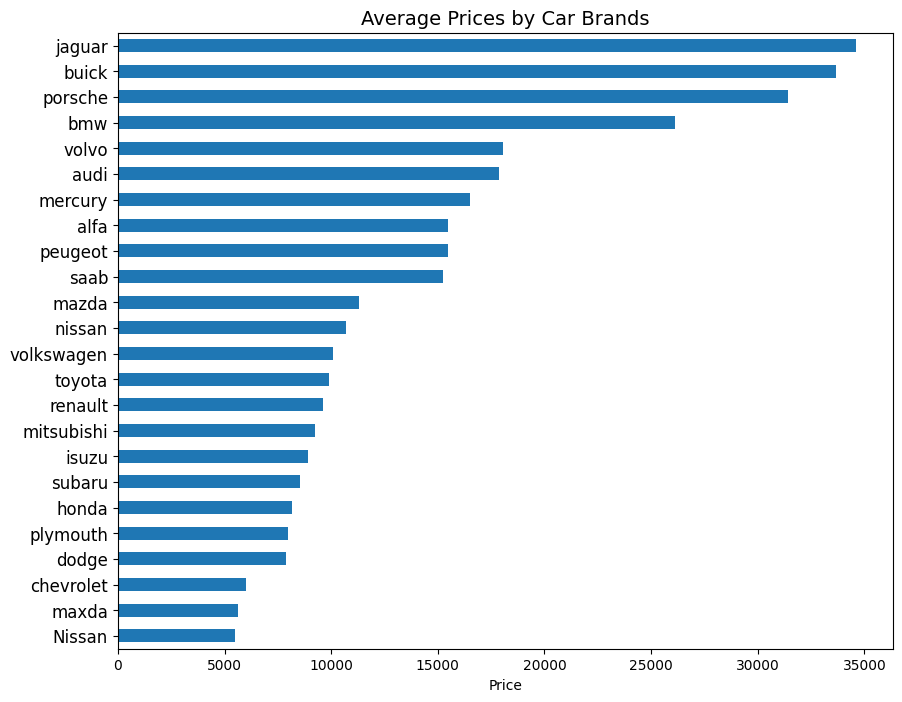

In [ ]:
brand_price_val = round(df.groupby("car_brand")["price"].mean())
brand_price = brand_price_val.sort_values(ascending=True)
brand_price.plot.barh(figsize=(10,8)).set_title("Average Prices by Car Brands", size=14)
plt.xticks(size = 10)
plt.yticks(size = 12)
plt.ylabel("")
plt.xlabel("Price");

<Figure size 1500x1000 with 0 Axes>

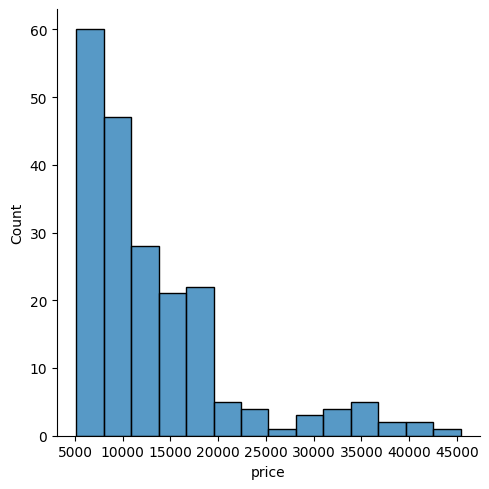

In [ ]:
plt.figure(figsize=(15, 10))
fig=sns.displot(df.price)


<ipython-input-153-4c6be9ee0129>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm", annot=True)


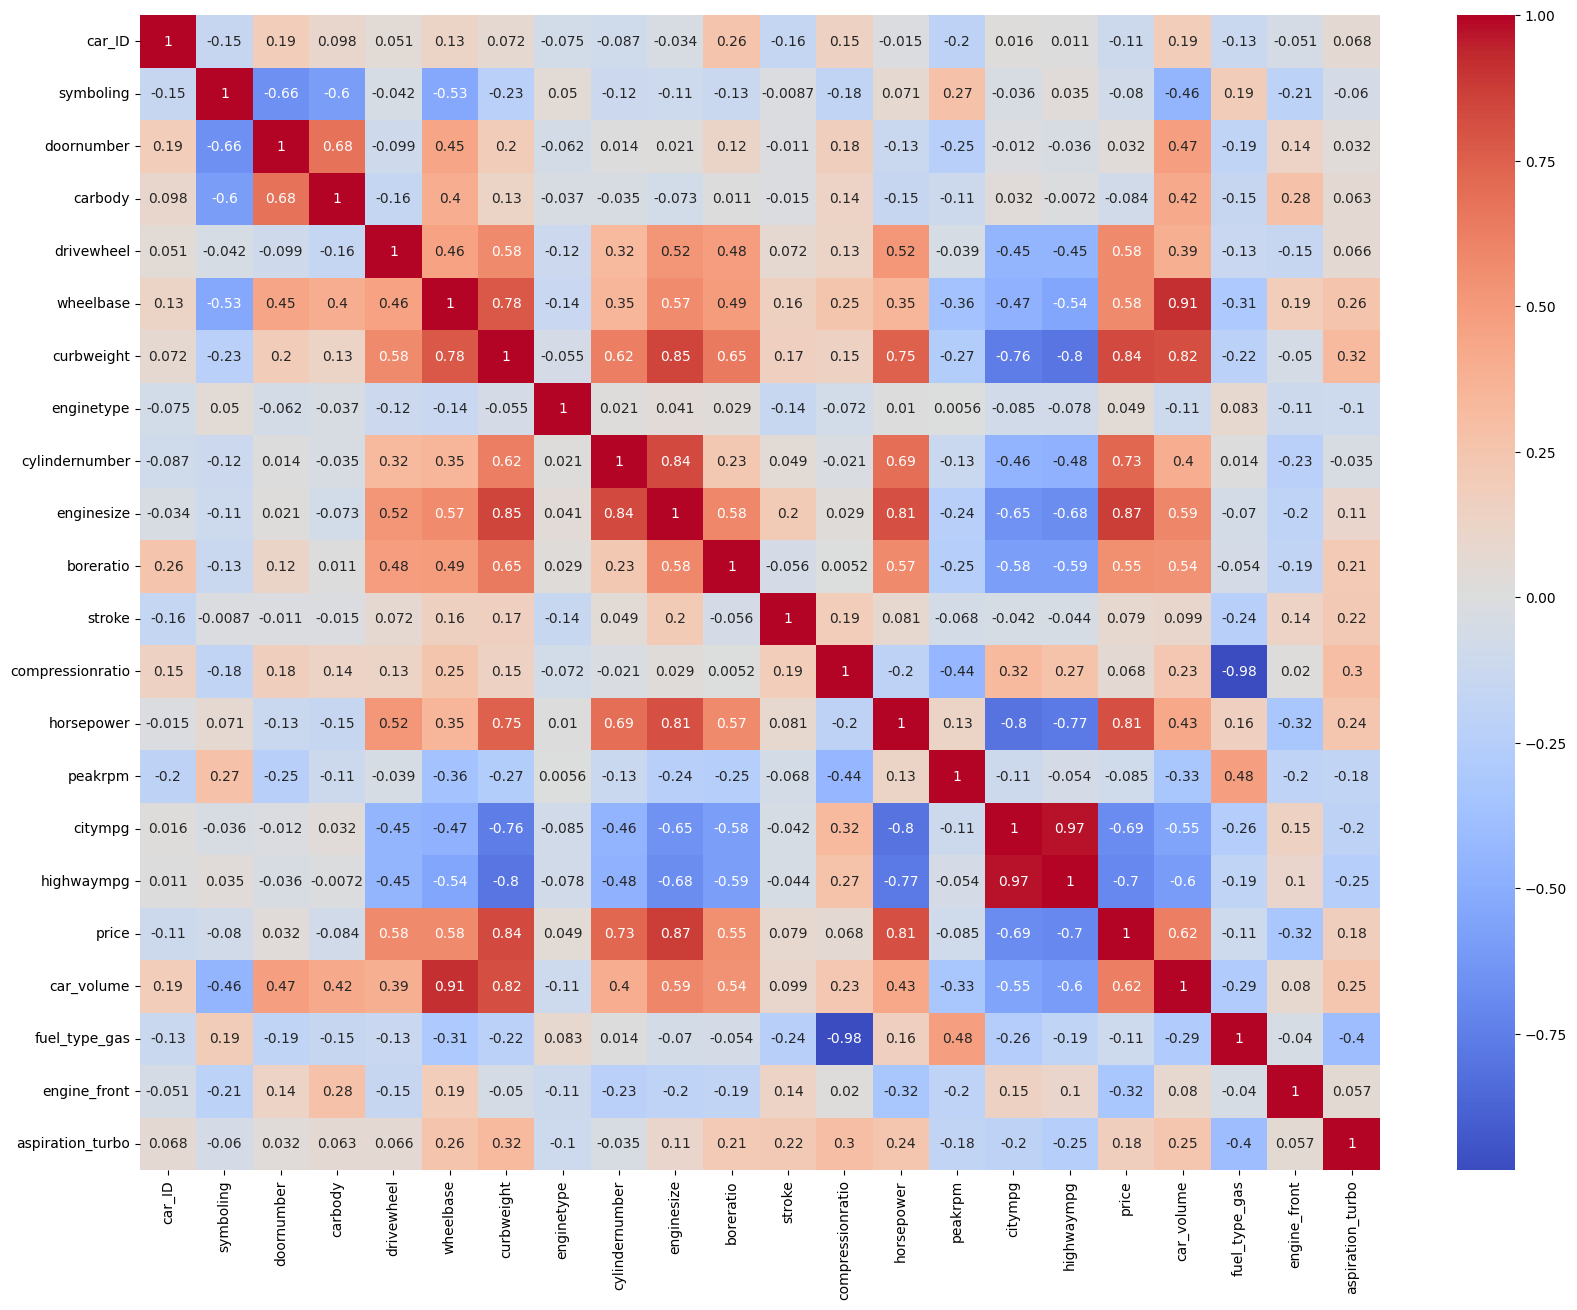

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()


In [ ]:
numerical_columns = df[df.select_dtypes(exclude=['object']).columns]

In [ ]:
numerical_columns.reset_index()
numerical_columns

,car_ID,symboling,doornumber,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_volume,fuel_type_gas,engine_front,aspiration_turbo
0,1,3,2,0,2,88.6,2548,0,2,130,...,9.0,111,5000,21,27,13495.0,528019.904,1,1,0
1,2,3,2,0,2,88.6,2548,0,2,130,...,9.0,111,5000,21,27,16500.0,528019.904,1,1,0
2,3,1,2,2,2,94.5,2823,5,4,152,...,9.0,154,5000,19,26,16500.0,587592.640,1,1,0
3,4,2,4,3,1,99.8,2337,3,2,109,...,10.0,102,5500,24,30,13950.0,634816.956,1,1,0
4,5,2,4,3,0,99.4,2824,3,3,136,...,8.0,115,5500,18,22,17450.0,636734.832,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,3,2,109.1,2952,3,2,141,...,9.5,114,5400,23,28,16845.0,721961.760,1,1,0
201,202,-1,4,3,2,109.1,3049,3,2,141,...,8.7,160,5300,19,25,19045.0,720913.920,1,1,1
202,203,-1,4,3,2,109.1,3012,5,4,173,...,8.8,134,5500,18,23,21485.0,721961.760,1,1,0
203,204,-1,4,3,2,109.1,3217,3,4,145,...,23.0,106,4800,26,27,22470.0,721961.760,0,1,1


22 Index(['car_ID', 'symboling', 'doornumber', 'carbody', 'drivewheel',
       'wheelbase', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'car_volume', 'fuel_type_gas',
       'engine_front', 'aspiration_turbo'],
      dtype='object')


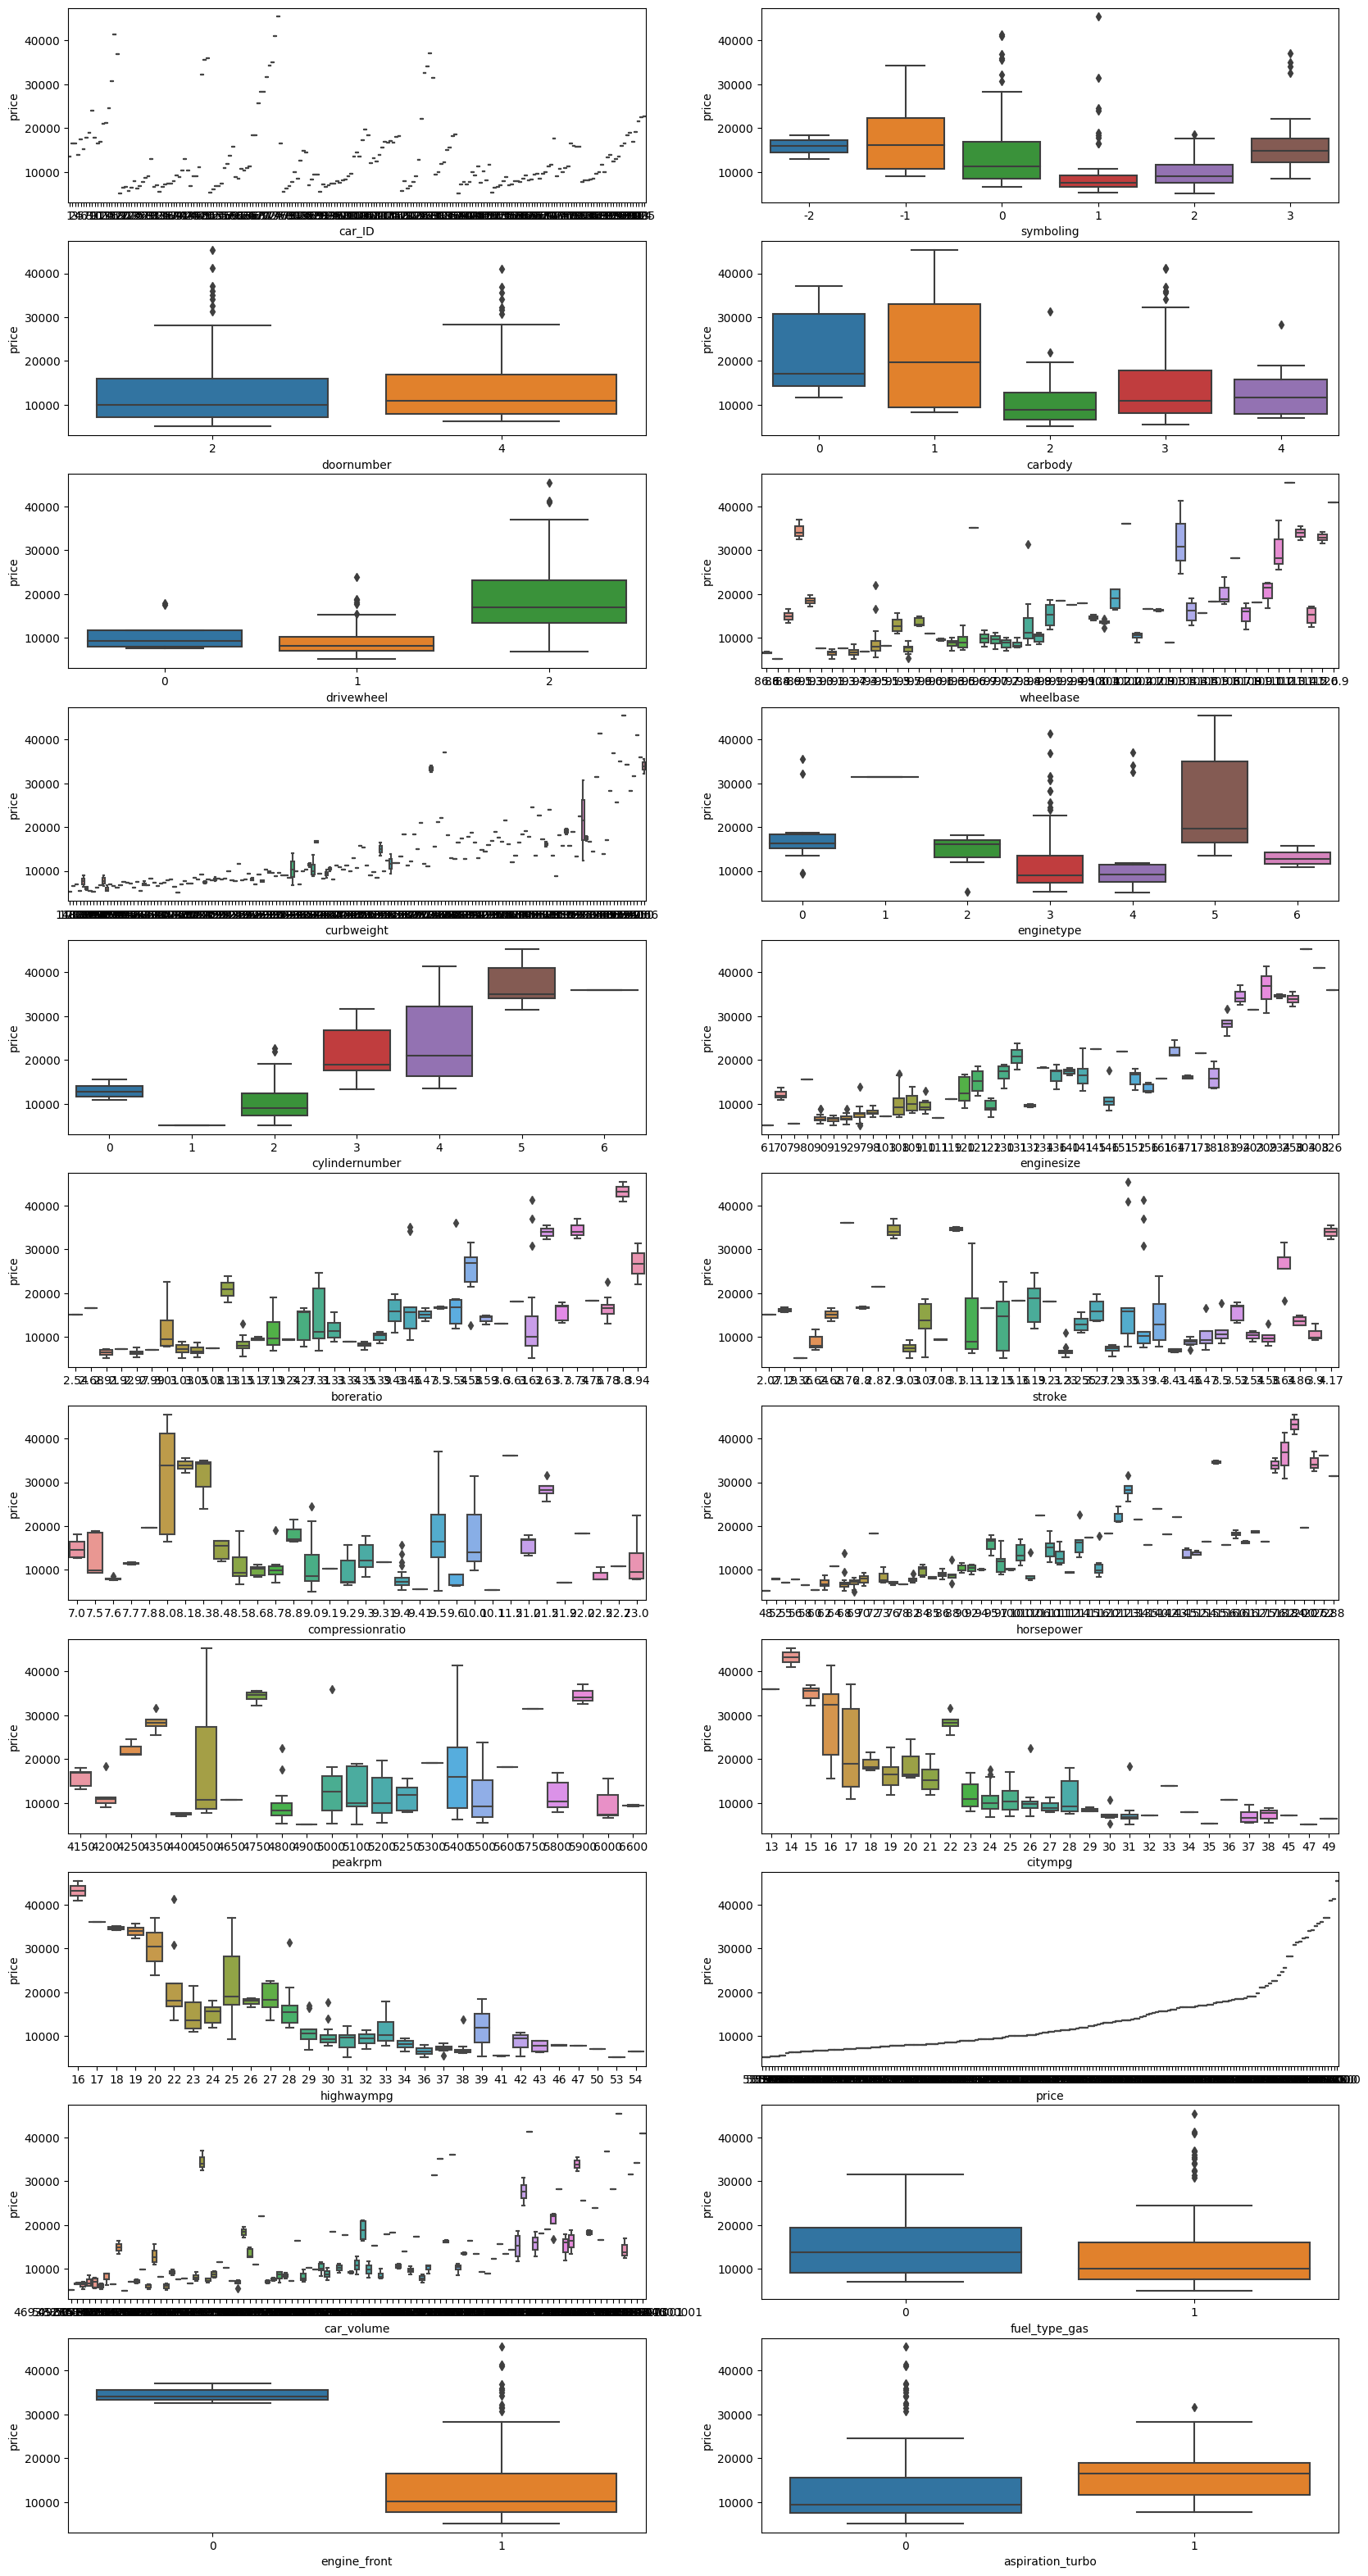

In [ ]:
plt.figure(figsize=(20, 40))
columns=numerical_columns.columns

i=0
for col in columns:
    i=i+1
    plt.subplot(11,2,i)
    sns.boxplot(x = col, y = 'price', data = df)
plt.show()

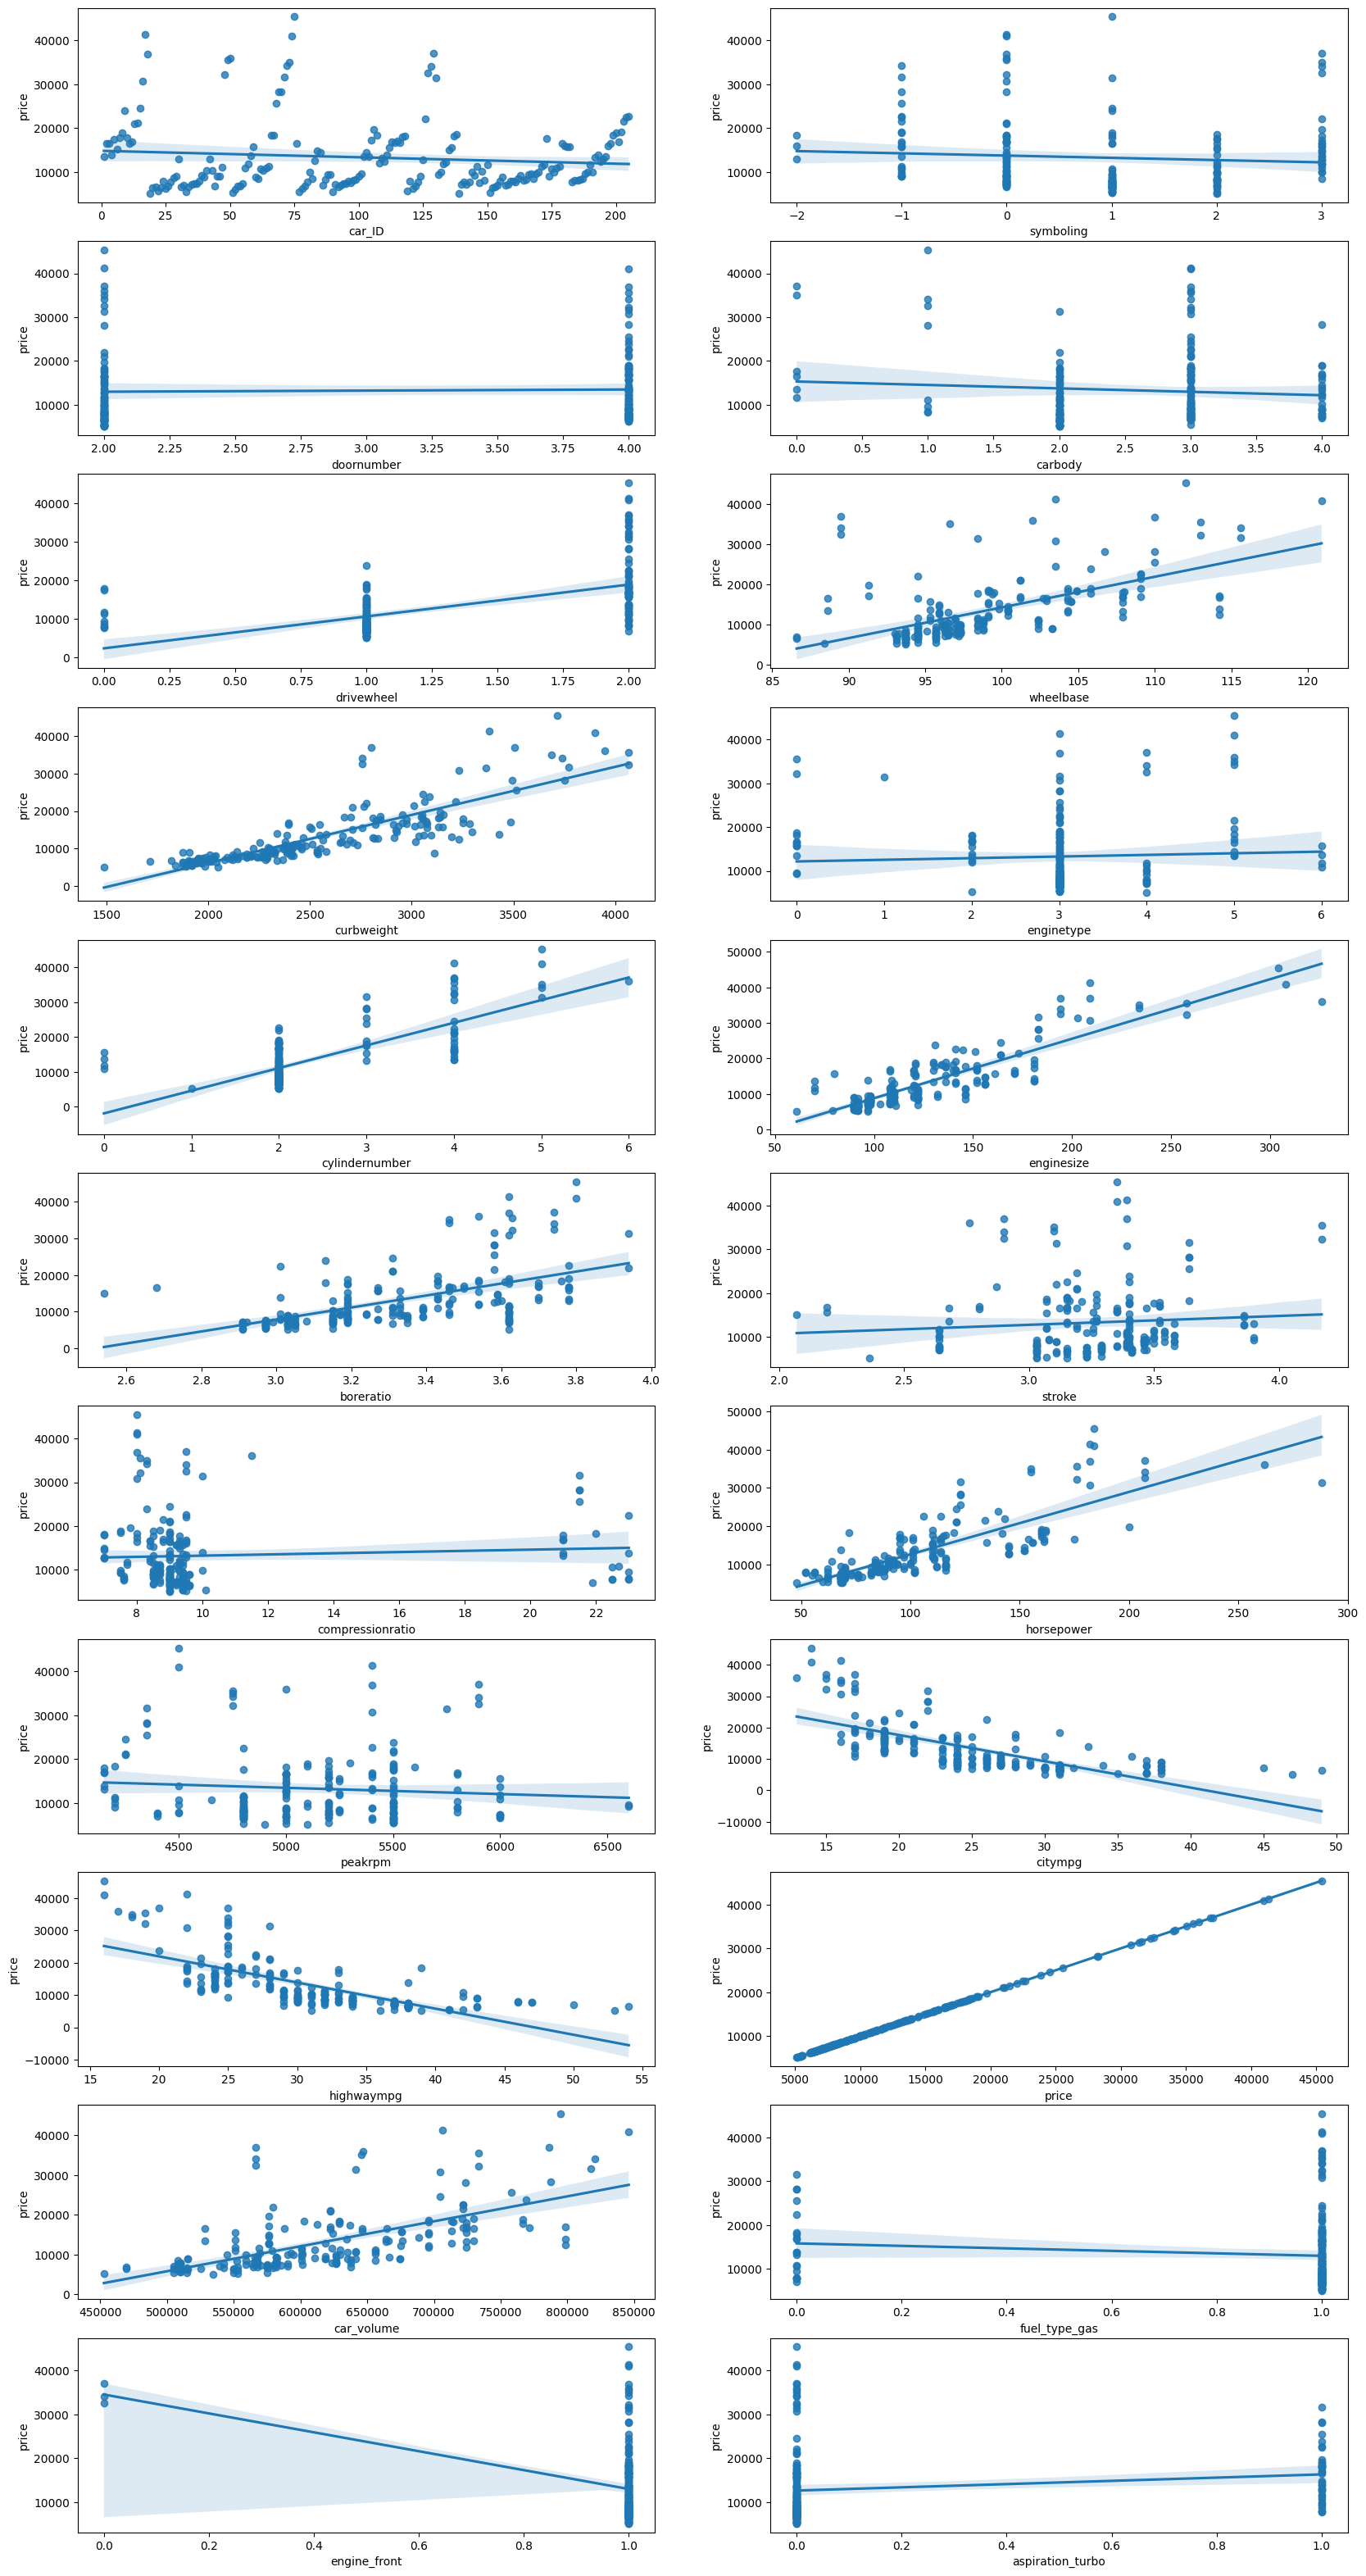

In [ ]:
plt.figure(figsize=(20,40))
i=0
for col in columns:
    i=i+1
    plt.subplot(11,2,i)
    sns.regplot(x = col, y = 'price', data = df)
plt.show()

In [ ]:
data =df[df.select_dtypes(exclude=['object']).columns].reset_index()


x = (data.drop(["price"], 1))
y = (data["price"])


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42)


from sklearn.preprocessing import StandardScaler
sc=StandardScaler() # creating an instance of the class object
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain, ytrain)


<ipython-input-158-dcae99ed3876>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = (data.drop(["price"], 1))


LinearRegression()

In [ ]:
# Prediction
ypredict=model.predict(xtest)

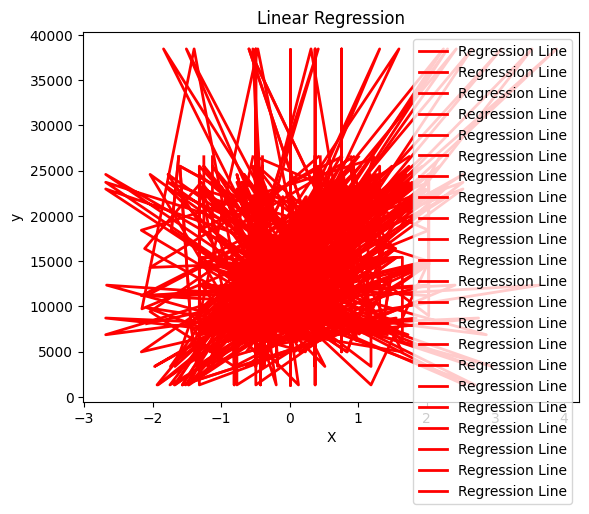

In [ ]:
plt.plot(xtest, ypredict, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Evaluation
print(f"MAE: {mean_absolute_error(ytest, ypredict)}")
print(f"RMSE: {mean_squared_error(ytest, ypredict)}")
print("Model accuracy score")
model.score(xtest,ytest)

MAE: 2391.4025505754576
RMSE: 12920246.514973244
Model accuracy score


0.8363366044571143